# CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS
# Project 1: Integration of Mergesort & Insertion Sort

In [1]:
import random
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)

### (a) Algorithm implementation: Implement the above hybrid algorithm.

In [2]:
#################### MERGESORT & INSERTION SORT ####################
#### input: array, threshold integer | output: key comparisons
def insertMergeSort(arr, S):
    keyComp = 0 
    # merge sort
    if len(arr) > S:
        mid = len(arr) // 2  # floor division

        left = arr[:mid]
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            # case 1: left element is bigger
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
                
            # case 2: right element is bigger
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
                
            # case 3: both elements have the same keynvalue
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1
            
    # Insertion Sort
    else:
        for i in range(1, len(arr)):
            for j in range(i, 0, -1):
                keyComp += 1
                if arr[j] < arr[j - 1]:
                    arr[j], arr[j - 1] = arr[j - 1], arr[j]
                else:
                    break

    return keyComp  # report key comparisons
####################################################################

### (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million.

In [3]:
######################## INPUT GENERATOR ########################
### input: array size, largest integer allowed | output: array
def inputGen(sizeArr, x):
    returnList = []
    for i in range(0, sizeArr):
        n = random.randint(1, x)
        returnList.append(n)
    return returnList
################################################################

### Helper Functions

In [4]:
##################### printList #####################
### input: array | output: N/A (print to console)
def printList(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
####################################################

In [5]:
##################### plotGraphFromDF #####################
### input: dataframe with two columns, X and Y | output: N/A (pop-up window with plot)
def plotGraphFromDF(df):
    plt.plot(df[df.columns[0]], df[df.columns[1]])
    plt.title(df.columns[1] + ' against ' + df.columns[0])
    plt.ylabel(df.columns[1])
    plt.xlabel(df.columns[0])

plt.show()
####################################################

### (c) Analyze time complexity

#### Cursory note 1: Using key comparisons instead of time taken

**Time taken** for an algorithm to run is highly dependent on the availability of CPU resources / presence of other programs. We would like to adopt a more theoretical framework by observing the number of **key comparisons**

#### Cursory note 2: Deciding on the value of x (the largest number of the array)

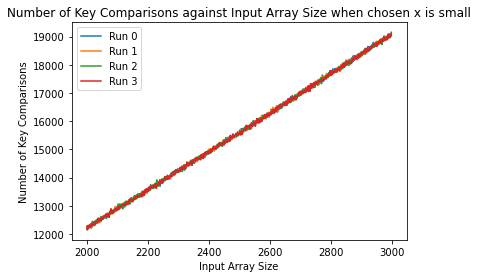

In [6]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=5
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is small")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.show()

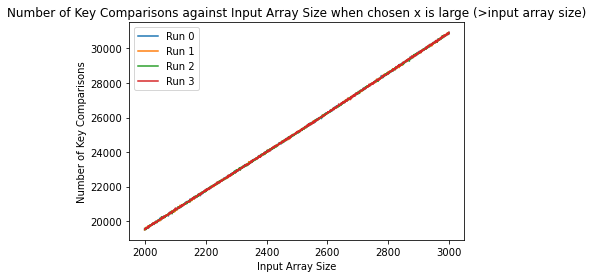

In [7]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=1000000
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is large (>input array size)")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.show()

As seen from comparing the two graphs, the variability of the number of key comparisons is greater when x is small. This is because, with small x, there is a higher probability of having duplicate keys in the array, resulting in less key comparisons when sorting.

**Hence, there is a need to select a sufficiently high value of x to minimise duplicate keys and hence reduce the variance in key comparisons**

Formally, if x is less than the array size, there will definitely be duplicate keys (pigeonhole principle), although the inverse is not true (we can still have duplicate keys with high x by the nature of random number generator)

### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

In [9]:
S = 4
df = pd.DataFrame(columns = ['sizeArr', 'keyCompArr']) # Create empty dataframe

for i in range(3,8,1):
    for j in range(1, 10, 2):
        arr = inputGen(j * pow(10,i), pow(10,7))
        keyComp = insertMergeSort(arr, S)
    
        df = df.append({'sizeArr' : j * pow(10,i), 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
df

,sizeArr,keyCompArr
0,1000,8782
1,3000,30920
2,5000,55296
3,7000,80967
4,9000,107350
5,10000,120530
6,30000,410155
7,50000,718489
8,70000,1041669
9,90000,1369314


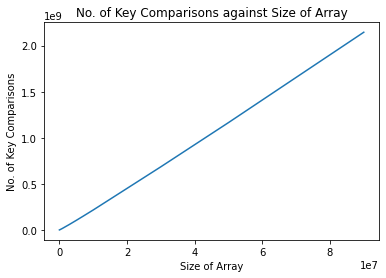

In [10]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'Size of Array'          : df['sizeArr'],
            'No. of Key Comparisons' : df['keyCompArr']
        }
    )
)

### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity

Let n = 10,000 for the sake of this comparison
Since S supposed to be a small integer, test S = 1 to S = 20.

In [11]:
df2 = pd.DataFrame(columns = ['S', 'keyCompArr']) # Create empty dataframe
arr2 = inputGen(pow(10,4), pow(10,4)) # Test on the same array
    
for i in range(1,11,1):
    tempArr = arr2.copy()
    keyComp = insertMergeSort(tempArr, pow(2,i))
    df2 = df2.append({'S' : pow(2,i), 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
    
df2

,S,keyCompArr
0,2,116675
1,4,116748
2,8,117649
3,16,123250
4,32,140256
5,64,179990
6,128,266334
7,256,453186
8,512,829038
9,1024,1589195


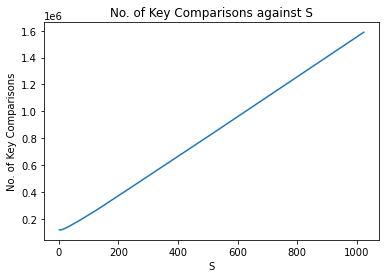

In [12]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'S'                      : df2['S'],
            'No. of Key Comparisons' : df2['keyCompArr']
        }
    )
)

### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm

### Time Complexity for insertMergeSort (S=4)

#### INSERTIONSORT PART
- The ith iteration may have 1,2...i key comparisons, each with 1/i chance. 
- Average number of comparisons in the ith iteration: 

1⠀⠀⠀i⠀⠀⠀⠀⠀⠀⠀⠀⠀1

–⠀⠀⠀∑⠀⠀j⠀⠀⠀=⠀⠀–⠀(1+2+...+i)

i⠀⠀⠀j=1⠀⠀⠀⠀⠀⠀⠀⠀i

- Hence, total complexity:

S-1⠀⠀⠀1⠀⠀⠀i⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀⠀∑⠀⠀j⠀⠀)⠀⠀⠀

i=1⠀⠀⠀i⠀⠀⠀j=1⠀⠀⠀⠀⠀

------

S-1⠀⠀⠀1⠀⠀⠀i (i+1)⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀––––––    )⠀⠀⠀

i=1⠀⠀⠀i⠀⠀⠀⠀2⠀⠀⠀⠀⠀

------

S-1⠀⠀⠀1⠀⠀⠀⠀⠀⠀⠀⠀⠀

⠀∑ ⠀(⠀–⠀⠀(i+1)   )⠀⠀⠀

i=1⠀⠀⠀2⠀⠀⠀⠀⠀⠀⠀⠀⠀

------

= 1/2 (2+S)(S-1)/2

= (S+2)(S-1)/4

Since S is fixed, total time complexity = O(1)

-----

#### MERGESORT PART
##### Merge function:
- Best case, e.g. when list is already sorted allowing first sublist to traverse till end, is Θ(n/2)
- Worst case, e.g. when list is sorted the wrong way, is Θ(n-1)

##### Main function in worst case:

W(n)

= W(n/2) + W(n/2) + (n-1)
    
= 2W(n/2) + (n-1)
    
= 2<sup>2</sup>W(n/2<sup>2</sup>) + (n-1) + 2(n/2-1)
    
= 2<sup>3</sup>W(n/2<sup>3</sup>) + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1)
    
= ....

= 2<sup>k</sup>W(n/2<sup>k</sup>) + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1) + ... + 2<sup>k</sup>(n/2<sup>k</sup>-1)

For S=4, terminating condition is when 2<sup>k</sup> = n/4, hence n = 2<sup>k+2</sup> and log<sub>2</sub>n = k+2

= nW(4)/4 + (n-1) + 2(n/2-1) + 2<sup>2</sup>(n/2<sup>2</sup>-1) + ... + (n-2<sup>k</sup>)

= nW(4)/4 + (n-1) + (n-2) + (n-2<sup>2</sup>) ... + (n-2<sup>k</sup>)

= nW(4)/4 + (n-2<sup>0</sup>) + (n-2<sup>1</sup>) + (n-2<sup>2</sup>) ... + (n-2<sup>k</sup>)

= nW(4)/4 + (k+1)(n) - (2<sup>0</sup>+2<sup>1</sup>+2<sup>2</sup>...+2<sup>k</sup>)

= nW(4)/4 + (k+1)(n) - (1(2<sup>k+1</sup>-1)/(2-1))

= nW(4)/4 + (k+1)(n) - (2<sup>k+1</sup>-1)

= nW(4)/4 + (k+1)(n) - (n/2-1)

= nW(4)/4 + (log<sub>2</sub>n-1)(n) - (n/2-1)

= O(n) + O(nlgn) - O(n) = O(nlgn)

### d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task

In [13]:
#################### MERGESORT ####################
#### input: array, threshold integer | output: key comparisons
def mergeSort(arr, S):
    keyComp = 0
    if len(arr) > 1:
        mid = len(arr) // 2  # floor division

        left = arr[:mid]
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1

    return keyComp  # report key comparisons
####################################################################

In [14]:
S = 4 # input optimal S here
arr3 = inputGen(pow(10,7), pow(10,7)) # array of 10 million integers
arr4 = arr3.copy()

t1_start = process_time()  # For insertMergeSort
kc1 = insertMergeSort(arr3, S)
t1_stop = process_time()  

t2_start = process_time()  # For insertMergeSort
kc2 = mergeSort(arr4, S)
t2_stop = process_time()  


print("Done")

Done


**Hybrid Insertion-Mergesort:**

In [15]:
print("No. of key comparisons: ", kc1, end="\n")
print("Elapsed time during the whole program in seconds:",t1_stop - t1_start)  

No. of key comparisons:  216443264
Elapsed time during the whole program in seconds: 98.20883799999956


**Classic Mergesort:**

In [16]:
print("No. of key comparisons: ", kc2, end="\n")
print("Elapsed time during the whole program in seconds:",t2_stop - t2_start) 

No. of key comparisons:  216443264
Elapsed time during the whole program in seconds: 96.75649599999997
